In [1]:
from math import sqrt
from collections import Counter

def euclidean(p1, p2):
    return sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

def knn_classify(train_set, test_points, k=3):
    results = []
    for test in test_points:
        # Calculate distances to all training points
        distances = [(label, euclidean(test, point)) for label, point in train_set]
        # Sort by distance
        distances.sort(key=lambda x: x[1])
        # Take top-k labels
        top_k = [label for label, _ in distances[:k]]
        # Majority vote
        most_common = Counter(top_k).most_common(1)[0][0]
        results.append((test, most_common))
    return results

# Training data: (label, (x, y))
train_data = [
    ('A', (1, 3)),
    ('A', (2, 1)),
    ('A', (2, 3)),
    ('B', (4, 3)),
    ('B', (6, 3)),
]

# Test points
test_points = [
    (1, 5),
    (5, 1),
    (2, 6),
    (3, 4),
]

# Run k-NN
classified = knn_classify(train_data, test_points, k=3)
for point, label in classified:
    print(f"Point {point} is classified as: {label}")


Point (1, 5) is classified as: A
Point (5, 1) is classified as: B
Point (2, 6) is classified as: A
Point (3, 4) is classified as: A


## Zadanie 2


In [2]:
# Inserting data
import pandas as pd

df = pd.read_csv("wdbc.data")
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [16]:
from sklearn.model_selection import train_test_split
# Divide data into training and test
X = df.drop(columns='diagnosis')
y = df.diagnosis

# Divide Data to Train and Test
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=10
)

# Divide Train to Train and Validation
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.2, stratify=y_train_val, random_state=10
)

# Check size of the Divided sets
print(f'Train set: {X_train.shape}, Validation set: {X_val.shape}, Test set: {X_test.shape}')

Train set: (364, 30), Validation set: (91, 30), Test set: (114, 30)


In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

knn = KNeighborsClassifier(n_neighbors=5) # create

knn.fit(X_train, y_train) # train

y_val_pred = knn.predict(X_val) # predict

print("Classification Report:")
print(classification_report(y_val, y_val_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))

Classification Report:
              precision    recall  f1-score   support

           B       0.92      0.98      0.95        57
           M       0.97      0.85      0.91        34

    accuracy                           0.93        91
   macro avg       0.94      0.92      0.93        91
weighted avg       0.94      0.93      0.93        91

Confusion Matrix:
[[56  1]
 [ 5 29]]


In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)

y_val_pred_scaled = knn_scaled.predict(X_val_scaled)

print("Classification Report (scaled):")
print(classification_report(y_val, y_val_pred_scaled))

print("Confusion Matrix (scaled):")
print(confusion_matrix(y_val, y_val_pred_scaled))

Classification Report (scaled):
              precision    recall  f1-score   support

           B       0.98      0.98      0.98        57
           M       0.97      0.97      0.97        34

    accuracy                           0.98        91
   macro avg       0.98      0.98      0.98        91
weighted avg       0.98      0.98      0.98        91

Confusion Matrix (scaled):
[[56  1]
 [ 1 33]]


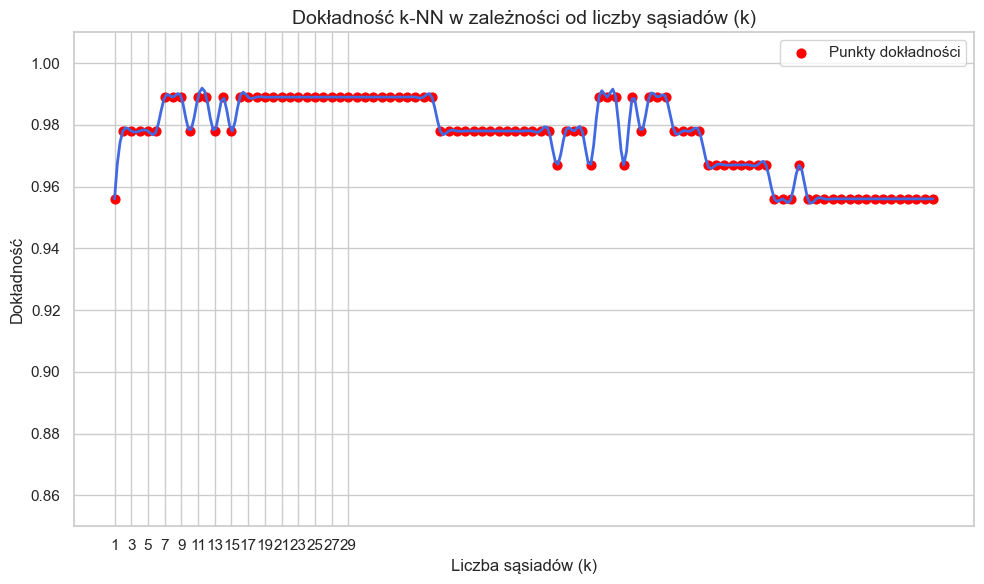

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from scipy.interpolate import make_interp_spline
import numpy as np

# Styl Seaborn
sns.set(style="whitegrid")

# Zbieramy dokładności dla różnych k
k_values = range(1, 100)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_val_scaled)
    acc = accuracy_score(y_val, y_pred)
    accuracies.append(acc)

# Interpolacja dla gładkiego wykresu
k_values_smooth = np.linspace(min(k_values), max(k_values), 300)
spline = make_interp_spline(k_values, accuracies)
accuracies_smooth = spline(k_values_smooth)

# Wykres
plt.figure(figsize=(10, 6))
plt.plot(k_values_smooth, accuracies_smooth, color='royalblue', linewidth=2)
plt.scatter(k_values, accuracies, color='red', s=40, label='Punkty dokładności')
plt.title('Dokładność k-NN w zależności od liczby sąsiadów (k)', fontsize=14)
plt.xlabel('Liczba sąsiadów (k)', fontsize=12)
plt.ylabel('Dokładność', fontsize=12)
plt.xticks(np.arange(1, 31, step=2))
plt.ylim(0.85, 1.01)
plt.legend()
plt.tight_layout()
plt.show()

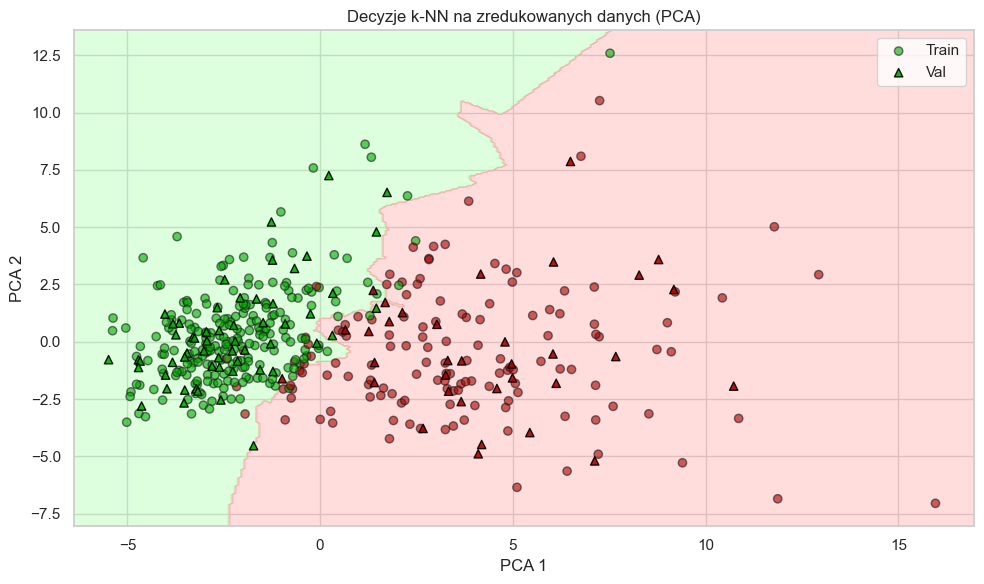

In [20]:
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

# Zakładamy że y_train i y_val to stringi ('M', 'B')
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_val_encoded = le.transform(y_val)

# PCA i transformacja danych
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)

# Trenowanie modelu k-NN na zakodowanych etykietach
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_pca, y_train_encoded)

# Tworzenie siatki do konturów
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Kolory
cmap_light = ListedColormap(['#AAFFAA', '#FFAAAA'])
cmap_bold = ListedColormap(['#00AA00', '#AA0000'])

# Wykres
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.4)

# Punkty treningowe
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train_encoded,
            cmap=cmap_bold, edgecolor='k', label='Train', alpha=0.6)

# Punkty walidacyjne
plt.scatter(X_val_pca[:, 0], X_val_pca[:, 1], c=y_val_encoded,
            cmap=cmap_bold, edgecolor='black', marker='^', label='Val', alpha=0.9)

plt.title('Decyzje k-NN na zredukowanych danych (PCA)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [15]:
# Zakładamy, że dane testowe też zostały przeskalowane
# (czyli X_test_scaled i y_test są gotowe)

# Zakoduj etykiety
y_test_encoded = le.transform(y_test)

# Użyj najlepszego modelu - tutaj k=5
best_knn = KNeighborsClassifier(n_neighbors=5)
best_knn.fit(X_train, y_train_encoded)

# Predykcja
y_pred_test = best_knn.predict(X_test)

# Ewaluacja
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("📊 Wyniki dla zbioru testowego:")
print("Dokładność (accuracy):", accuracy_score(y_test_encoded, y_pred_test))
print("\nMacierz omyłek:")
print(confusion_matrix(y_test_encoded, y_pred_test))
print("\nRaport klasyfikacji:")
print(classification_report(y_test_encoded, y_pred_test, target_names=le.classes_))

📊 Wyniki dla zbioru testowego:
Dokładność (accuracy): 0.9210526315789473

Macierz omyłek:
[[72  0]
 [ 9 33]]

Raport klasyfikacji:
              precision    recall  f1-score   support

           B       0.89      1.00      0.94        72
           M       1.00      0.79      0.88        42

    accuracy                           0.92       114
   macro avg       0.94      0.89      0.91       114
weighted avg       0.93      0.92      0.92       114

